# 1. Setting up environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , plot_roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

# 2. Process and split data

###### Read Data

In [2]:
data= pd.read_csv("E:\\FCAI\\Project\\project_selected\\Numerical Data\\healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


###### Plotting countplots

<AxesSubplot:xlabel='gender', ylabel='count'>

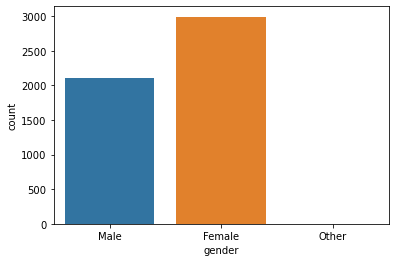

In [4]:
sns.countplot(x = data['gender'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

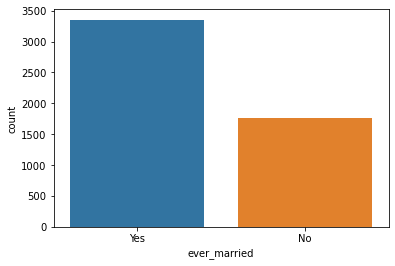

In [5]:
sns.countplot(x = data['ever_married'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

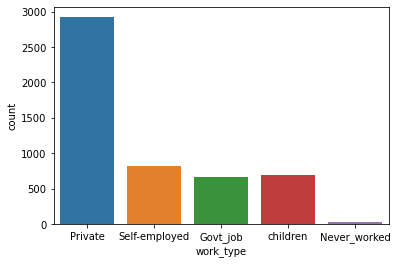

In [6]:
sns.countplot(x = data['work_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

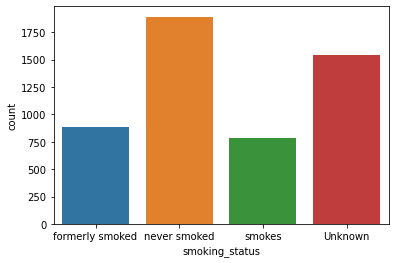

In [7]:
sns.countplot(x = data['smoking_status'])

<AxesSubplot:>

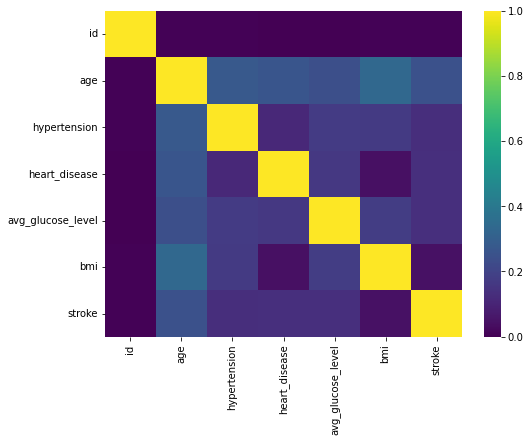

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap = 'viridis')

###### Cleaning Data And Change Missing Value

In [9]:
data['gender'] =data['gender'].replace({'Male':1,'Female':0,'Other':-1})
data['work_type'] =data['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2})
data['ever_married'] =data['ever_married'].replace({'Yes':1,'No':0})
data['Residence_type'] =data['Residence_type'].replace({'Urban':1,'Rural':0})
data['smoking_status'] =data['smoking_status'].replace({'formerly smoked':-1,'never smoked':0,'Unknown':0.469,'smokes':1})
data.bmi= data.bmi.replace([np.nan],28.893237)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,1,228.69,36.600000,-1.0,1
1,51676,0,61.0,0,0,1,1,0,202.21,28.893237,0.0,1
2,31112,1,80.0,0,1,1,0,0,105.92,32.500000,0.0,1
3,60182,0,49.0,0,0,1,0,1,171.23,34.400000,1.0,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.000000,0.0,1


###### Scatter plots of numerical variables colored by stroke.

In [10]:
Target = 'stroke'
pd.crosstab(data[Target], columns = 'Normalized', normalize = True)

col_0,Normalized
stroke,
0,0.951272
1,0.048728


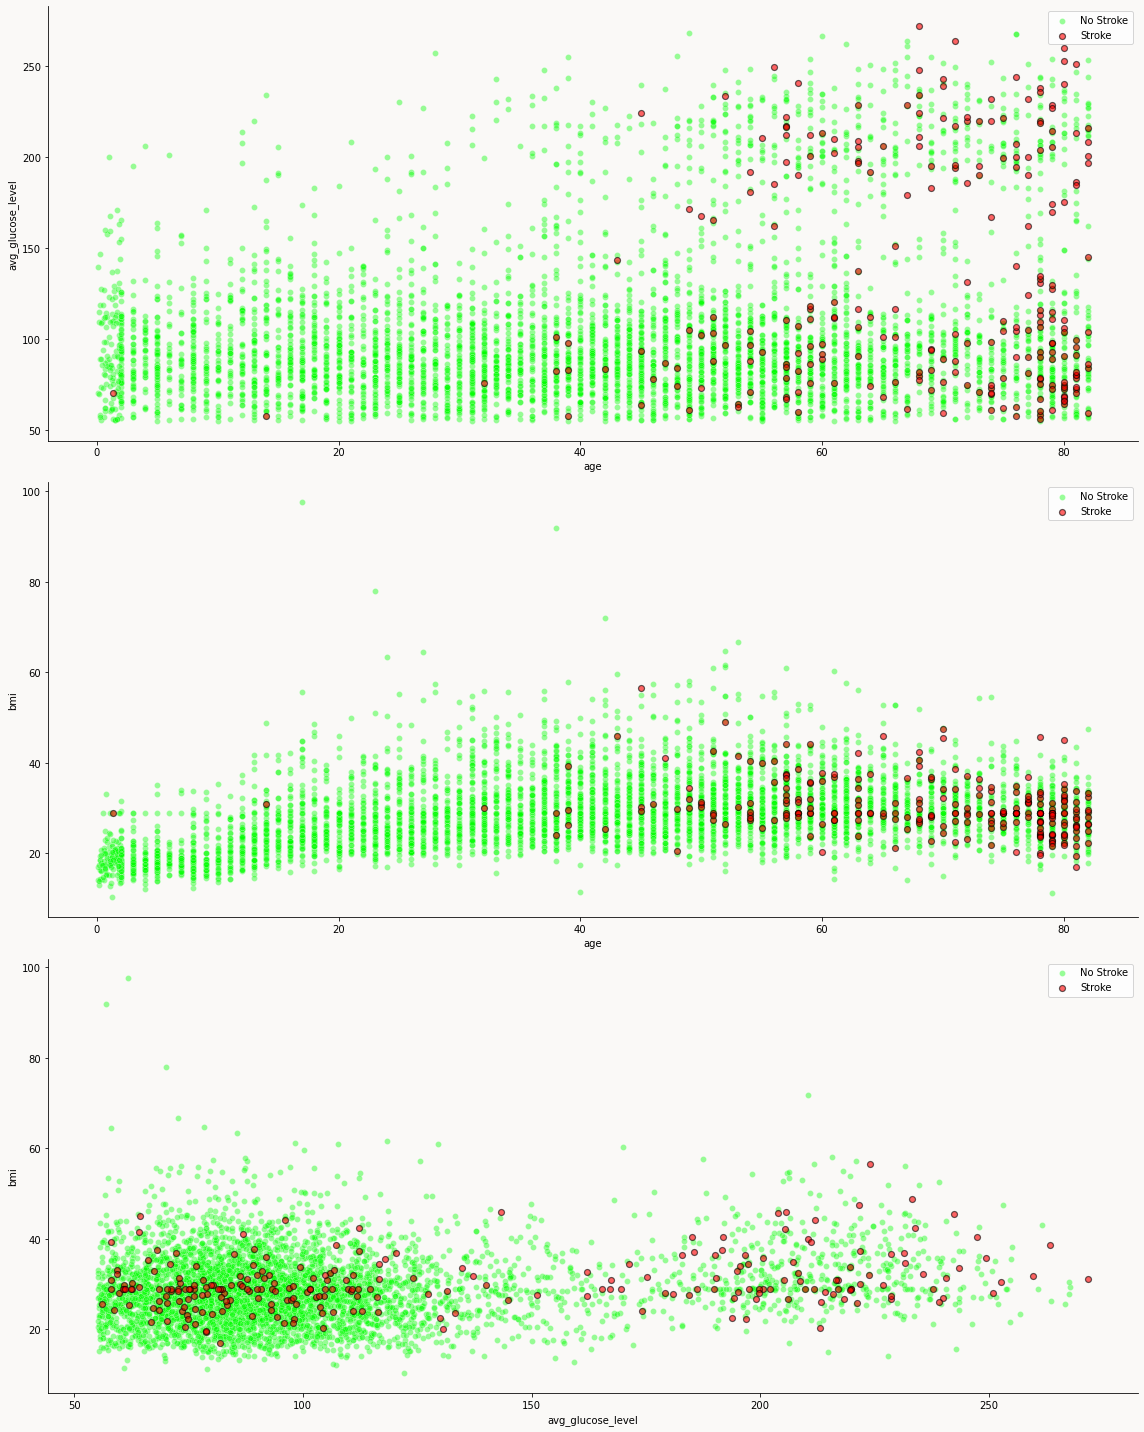

In [11]:
stroke = data[data['stroke'] == 1]
no_stroke = data[data['stroke'] == 0]
fig, ax = plt.subplots(3,1, figsize=(16,20))
fig.patch.set_facecolor('#faf9f7')
for j in range(0, 3):
    ax[j].set_facecolor('#faf9f7')

## Age vs Glucose Levels
sns.scatterplot(
    data = no_stroke, x = 'age', y = 'avg_glucose_level', color = '#00FF00',
    alpha = 0.4, ax = ax[0]
)
sns.scatterplot(
    data = stroke, x = 'age', y = 'avg_glucose_level', color = "#ff0000",
    ax = ax[0], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)

# Age vs BMI
sns.scatterplot(
    data = no_stroke, x = 'age', y = 'bmi', color = '#00FF00',
    alpha = 0.4, ax = ax[1]
)
sns.scatterplot(
    data = stroke, x = 'age', y = 'bmi', color = "#ff0000",
    ax = ax[1], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)

# Glucose Levels vs BMI
sns.scatterplot(
    data = no_stroke, x = 'avg_glucose_level', y = 'bmi', color = '#00FF00',
    alpha = 0.4, ax = ax[2]
)
sns.scatterplot(
    data = stroke, x = 'avg_glucose_level', y = 'bmi', color = "#ff0000",
    ax = ax[2], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)
    
sns.despine()

for i in range(0, 3, 1):
    ax[i].legend(['No Stroke', 'Stroke'])

fig.tight_layout()

###### feature selection

In [12]:
x = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

###### Data Scaling

In [13]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x = scaler.fit_transform(x)

###### split the data to train(90%), validation(5%) and test(5%)

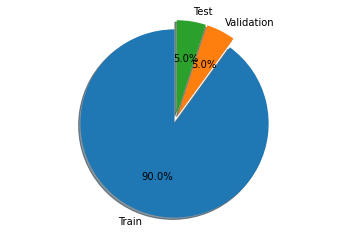

In [14]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.05,shuffle=True,random_state = 8)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.0526,shuffle=True,random_state= 8)
plt.pie([90,5,5],labels=('Train','Validation','Test'),explode = [0.05,0.05,0.05],autopct ='%1.1f%%',shadow = True,startangle = 90)
plt.axis('equal')
plt.show()

# 3.Logistic Regression Model

In [15]:
LogisticRegressionModel = LogisticRegression(C=0.1)
LogisticRegressionModel.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [16]:
y_pred_lr = LogisticRegressionModel.predict(x_val)

In [17]:
print('Accuracy Score: ', round(accuracy_score(y_val, y_pred_lr), 2))

Accuracy Score:  0.97


In [18]:
y_pred_lr = LogisticRegressionModel.predict(x_test)

In [19]:
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_lr), 2))

Accuracy Score:  0.98


###### Report of classification Result

In [20]:
cr = classification_report(y_test,y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       0.00      0.00      0.00         6

    accuracy                           0.98       256
   macro avg       0.49      0.50      0.49       256
weighted avg       0.95      0.98      0.96       256



C:\Users\computer.house\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\computer.house\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\computer.house\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Calculating Confusion Matrix

Confusion Matrix is : 
 [[249   0]
 [  7   0]]


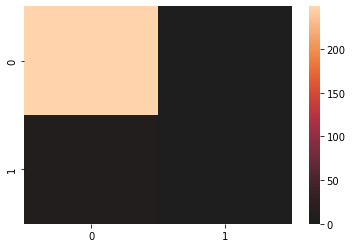

In [22]:
CM = confusion_matrix(y_val, y_pred_lr)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM,center = True)
plt.show()

###### Plot ROC Curve

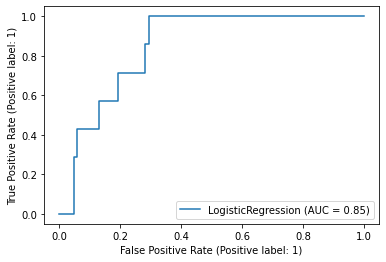

In [23]:
plot_roc_curve(LogisticRegressionModel,x_val,y_val)

# SVM Model

###### Using one Hot Encoding

In [24]:
ct = ColumnTransformer(transformers = [('encoder',  OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  4.18503199e+00
   2.70637544e+00  1.00123401e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ... -2.38946800e-01
   2.12155854e+00  1.10085619e-08]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  4.18503199e+00
  -5.02830130e-03  4.68577253e-01]
 ...
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ... -2.38946800e-01
  -5.11442636e-01  2.21736316e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -2.38946800e-01
   1.32825706e+00 -4.27845099e-01]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ... -2.38946800e-01
  -4.60867458e-01 -3.49895329e-01]]


###### Using SVM

In [25]:
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [26]:
y_pred_svm_v = classifier.predict(x_val)

In [27]:
AccScore = accuracy_score(y_val, y_pred_svm_v,normalize=True)
print('Accuracy Score is:{0:.2f}%'.format(100*AccScore))

Accuracy Score is:97.27%


In [28]:
y_pred_svm_t = classifier.predict(x_test)

In [29]:
AccScore = accuracy_score(y_test, y_pred_svm_t,normalize=True)
print('Accuracy Score is:{0:.2f}%'.format(100*AccScore))

Accuracy Score is:97.66%


###### Report of classification Result

In [30]:
cr_svm = classification_report(y_test,y_pred_svm_t)
print(cr_svm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       0.00      0.00      0.00         6

    accuracy                           0.98       256
   macro avg       0.49      0.50      0.49       256
weighted avg       0.95      0.98      0.96       256



C:\Users\computer.house\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\computer.house\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\computer.house\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[250   0]
 [  6   0]]


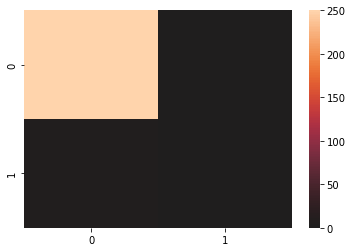

In [31]:
cm_svm = confusion_matrix(y_test, y_pred_svm_t)
print(cm_svm)
sns.heatmap(cm_svm,center = True)
plt.show()

###### Plot ROC Curve

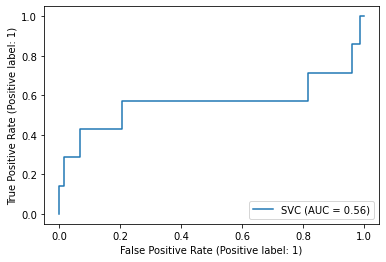

In [32]:
plot_roc_curve(classifier,x_val,y_val)